# Customer Churn Analysis
 This project explores patterns in telecom customer churn using exploratory data analysis (EDA) with Seaborn and Matplotlib. Key churn drivers are visualized and analyzed based on services, contracts, and payment methods.

**Objectives:**
- Explore **customer churn patterns** using visualizations
- Identify **key features** related to customer churn
- Gain insights to help **reduce churn** and **improve retention**

**Tools Used:** `Pandas`, `Matplotlib`, `Seaborn`, `Jupyter Notebook`
    
**Dataset:** [Telco Customer Churn(Kaggle)](https://www.kaggle.com/datasets/blastchar/telco-customer-churn?resource=download)


In [168]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install numpy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load dataset from CSV file
df = pd.read_csv('C:/Users/Dell/Desktop/Churn Analysis/Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [172]:
# inspection of data
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [201]:
# Show dataset information (columns, data types, non-null values)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Replacing blank `TotalCharges` with `0`, as these customers have a `tenure` of 0 and no charges recorded.

In [175]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", np.nan)
df['TotalCharges'] = df['TotalCharges'].astype(float)
df['TotalCharges'].fillna(0, inplace = True)

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [177]:
# Check for missing values in each column
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [202]:
# Check for duplicated rows in the dataset
df.duplicated().sum()

0

In [204]:
# Check for duplicated customer IDs(should be unique)
df['customerID'].duplicated().sum()

0

### Converting the values in the `SeniorCitizen` column from `1` and `0` to `"Yes"` and `"No"` respectively, to make the data more interpretable.


In [233]:
def conv(value):
    if value == 1:
        return "Yes"
    else:
        return "No"
    
df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)

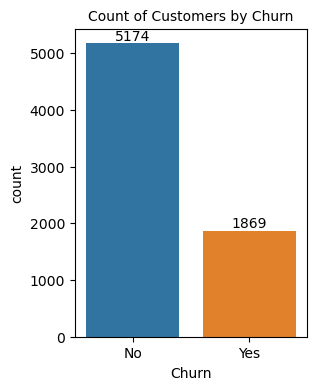

In [205]:
# Customer churn count plot with bar labels and title
plt.figure(figsize=(3,4))
ax = sns.countplot(x = 'Churn', data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn", fontsize = 10)
plt.show()

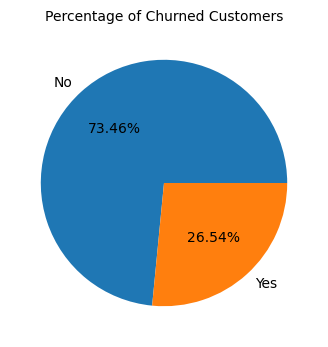

In [210]:
# Pie chart showing churn percentage distribution
plt.figure(figsize = (4,4))
churn_counts = df['Churn'].value_counts()
plt.pie(churn_counts, labels=churn_counts.index, autopct="%1.2f%%")
plt.title("Percentage of Churned Customers", fontsize = 10)
plt.show()

### From the given pie chart, we can conclude that `26.54%` of our customers have `churned`.  
### Now, let's explore the `reasons` behind it.

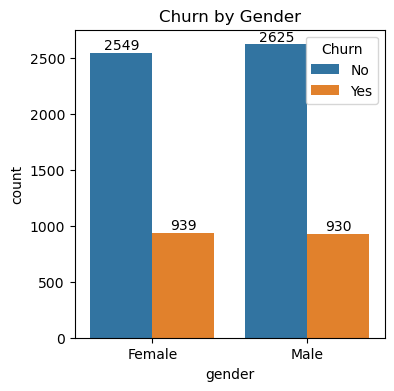

In [228]:
# Churn count plot by gender using hue for churn status
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "gender", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churn by Gender")
plt.show()

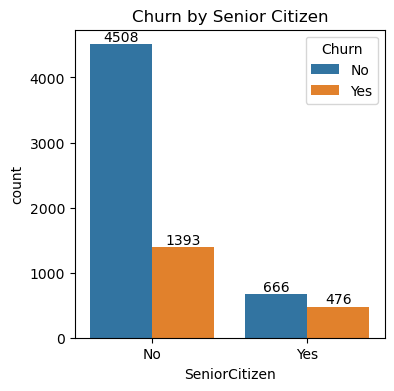

In [234]:
# Churn count plot by senior citizen status
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "SeniorCitizen", data = df, hue = "Churn")
for container in ax.containers:
    ax.bar_label(container)
plt.title("Churn by Senior Citizen")
plt.show()

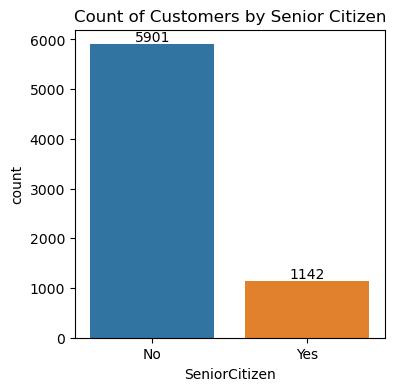

In [236]:
# Count plot of customers by senior citizen status with bar labels
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "SeniorCitizen", data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Senior Citizen")
plt.show()

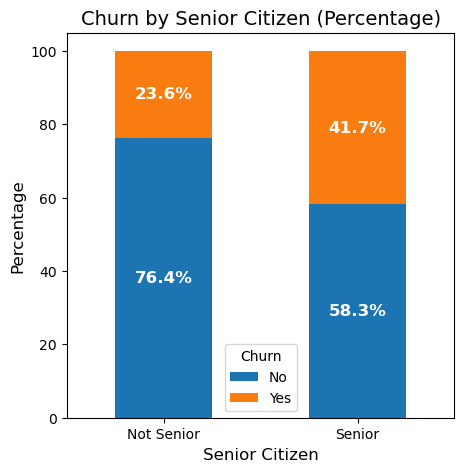

In [191]:
# Stacked bar chart showing churn percentage by senior citizen status

# Group data and calculate percentages
churn_counts = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()

# Converting the counts into percentages row-wise
churn_percent = churn_counts.div(churn_counts.sum(axis=1), axis=0) * 100

# Custom colors for the bars
colors = ['#1c74b3', '#f87c10']

# Plotting the stacked bar chart using the percentages
ax = churn_percent.plot(kind='bar', stacked=True, figsize=(5, 5), color=colors)

# Adding percentage labels inside the bars
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_y() + height / 2,
            f"{height:.1f}%",
            ha='center',
            va='center',
            fontsize=12,
            color="white",
            fontweight="bold"
        )

# Adding chart title and axis labels
plt.title("Churn by Senior Citizen (Percentage)", fontsize=14)
plt.xlabel("Senior Citizen", fontsize=12)
plt.ylabel("Percentage", fontsize=12)

# Custom x-axis tick labels for better readability
plt.xticks(ticks=[0, 1], labels=["Not Senior", "Senior"], rotation=0)

# Displaying legend with title
plt.legend(title="Churn", loc="best")

# Finally, displaying the plot
plt.show()


### `Senior citizens` show a `higher churn percentage` compared to `non-seniors`.

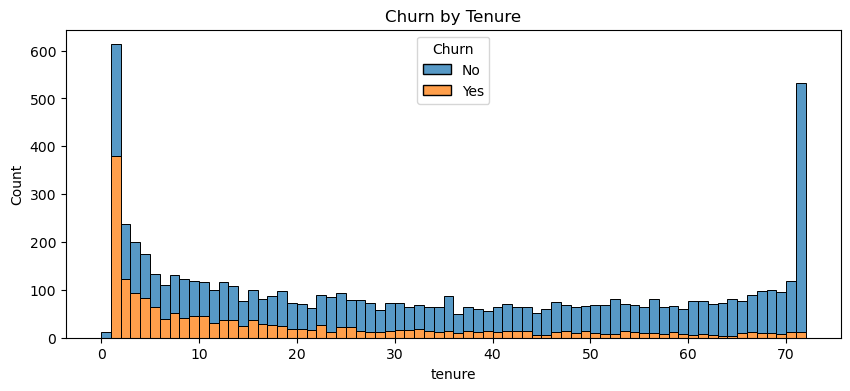

In [5]:
# Stacked histogram of customer tenure by churn status
plt.figure(figsize = (10,4))
ax = sns.histplot(x = "tenure", data = df, bins = 72, hue = "Churn", multiple = "stack")
plt.title("Churn by Tenure")
plt.show()

### `Churn` is more frequent among customers with `shorter tenure`.

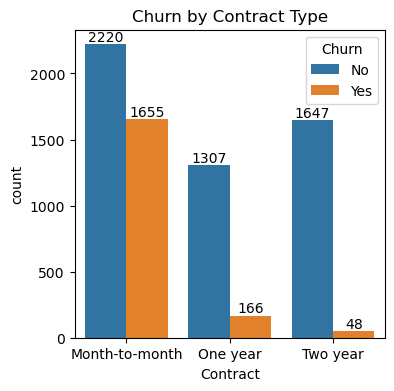

In [4]:
# Count plot of contract types with churn hue and bar labels
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "Contract", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churn by Contract Type")
plt.show()

### Customers with `Month-to-month contracts` show a noticeably `higher churn rate` compared to `One year` and `Two year contracts`.

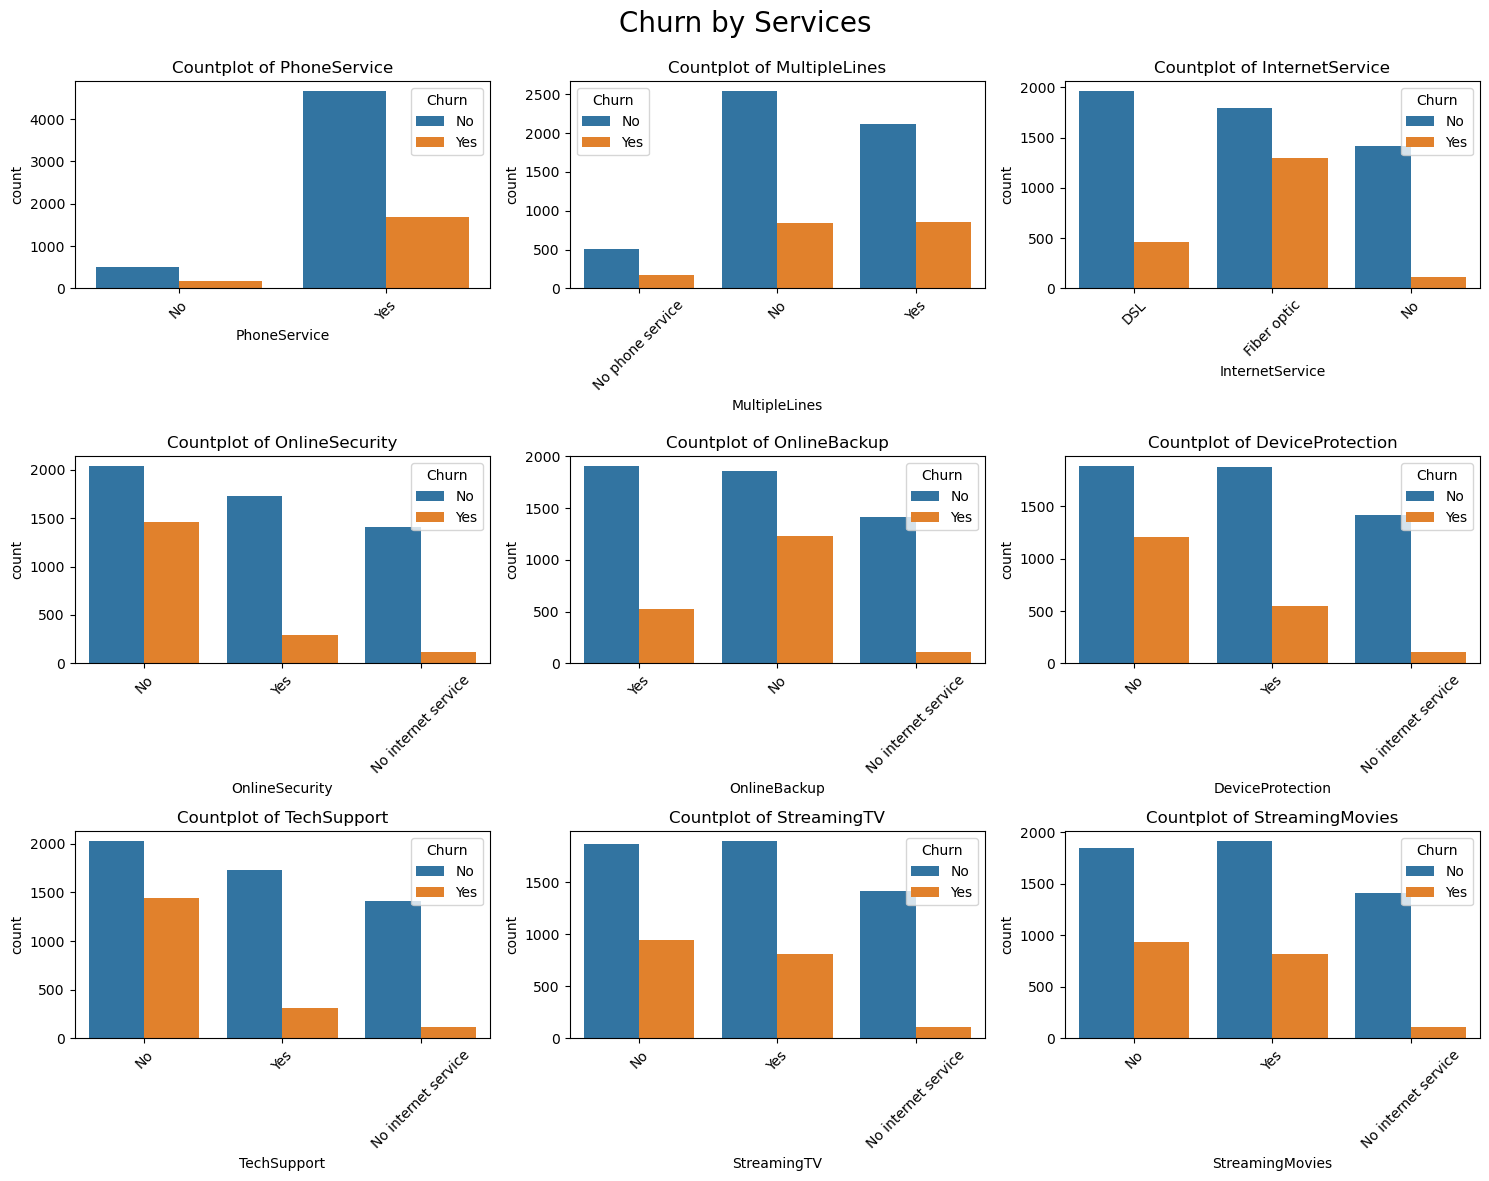

In [14]:
# Subplots of multiple service-related features with churn hue to compare churn distribution across categories

# Select columns to analyze using countplots
cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies'
]

# Define layout: 3 plots per row
n_cols = 3
n_rows = -(-len(cols) // n_cols)  # Ceiling division to get number of rows

# Create subplot grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()  # Flatten to 1D array for easy indexing

# Loop through columns and plot countplots
for i, col in enumerate(cols):
    sns.countplot(x=col, data=df, ax=axes[i], hue="Churn")
    axes[i].set_title(f"Countplot of {col}", fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout(rect=[0,0,1,0.95])
fig.suptitle("Churn by Services", fontsize = 20)
plt.show()


- Customers who **do not churn** tend to use **PhoneService**, **InternetService** (esp. **DSL**), and **OnlineSecurity**.
- Customers **without** services like **OnlineBackup**, **TechSupport**, or **StreamingTV** show **higher churn rates**.
- This suggests **bundled services** may help with **customer retention**.


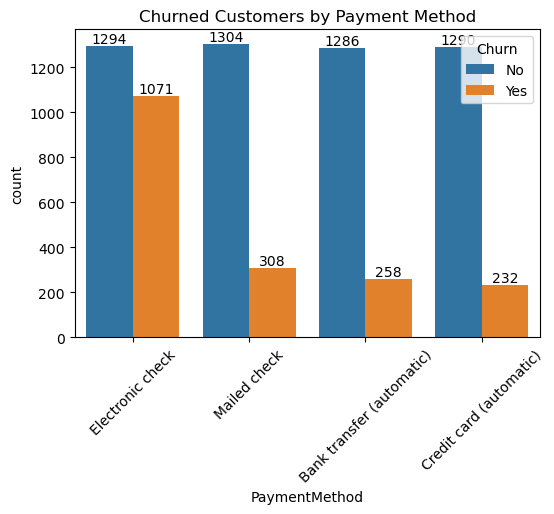

In [30]:
# Countplot of PaymentMethod with churn hue and bar labels

plt.figure(figsize=(6, 4))

# Create a count plot of PaymentMethod split by Churn status
ax = sns.countplot(x="PaymentMethod", data=df, hue="Churn")

# Add value labels on top of each bar
ax.bar_label(ax.containers[0])  
ax.bar_label(ax.containers[1]) 

# Set plot title
plt.title("Churned Customers by Payment Method")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()


**Electronic Check users** show the **highest churn**, whereas customers using **automatic payment methods** such as **Bank Transfer** or **Credit Card** tend to have **lower churn rates**.

### Conclusion
- `Month-to-month contracts` and `electronic check payments` are strongly associated with `higher churn`.

- Customers using `multiple` or `bundled services` (e.g., `OnlineSecurity`, `TechSupport`) are `less likely to churn`.

- Encouraging `long-term contracts` and `bundling services` may `improve retention`.
